In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [0]:
X,y=make_classification(n_samples=1000,n_classes=2)
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)


In [48]:
model=LogisticRegression(solver="lbfgs")
model.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
yhat=model.predict_proba(test_X)

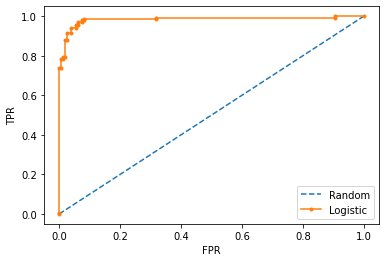

In [50]:
pos_prob=yhat[:,1]
plt.plot([0,1],[0,1],linestyle="--",label="Random")
fpr,tpr,t=roc_curve(test_y,pos_prob)
plt.plot(fpr,tpr,marker=".",label="Logistic")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [51]:
auc_score=roc_auc_score(test_y,pos_prob)
print(auc_score)

0.9844642857142858


In [52]:
model=DummyClassifier(strategy="stratified")
model.fit(train_X,train_y)
yhat=model.predict_proba(test_X)
pos_proba=yhat[:,1]
auc_score=roc_auc_score(test_y,pos_proba)
print(auc_score)

0.4982142857142857


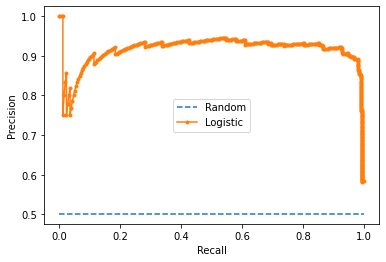

In [53]:
X,y=make_classification(n_samples=1000,n_classes=2)
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.5)
model=LogisticRegression(solver="lbfgs")
model.fit(train_X,train_y)
yhat=model.predict_proba(test_X)
pos_proba=yhat[:,1]
no_skill=len(y[y==1])/len(y)
plt.plot([0,1],[no_skill,no_skill],linestyle="--",label="Random")
Precision,Recall,t=precision_recall_curve(test_y,pos_proba)
plt.plot(Recall,Precision,marker=".",label="Logistic")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [54]:
auc_score=auc(Recall,Precision)
auc_score

0.9158880971258955

# For Imbalanced Dataset PRAUC is better than ROCAUC


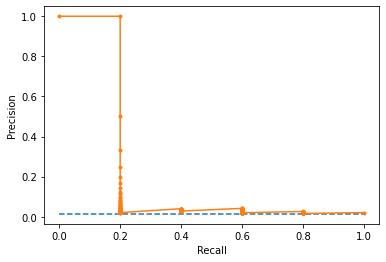

In [55]:
X,y=make_classification(n_samples=1000,n_classes=2,weights=[0.99,0.01])
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.5)
no_skill=len(y[y==1])/len(y)
plt.plot([0,1],[no_skill,no_skill],linestyle="--",label="Random")
model=LogisticRegression(solver="lbfgs")
model.fit(train_X,train_y)
yhat=model.predict_proba(test_X)
pos_proba=yhat[:,1]
precision,recall,t=precision_recall_curve(test_y,pos_proba)
plt.plot(recall,precision,marker=".",label="Logistic")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [56]:
model=DummyClassifier(strategy="stratified")
model.fit(train_X,train_y)
yhat=model.predict_proba(test_X)
pos_probs=yhat[:,1]
precision,recall,t=precision_recall_curve(test_y,pos_probs)
auc_score=auc(recall,precision)
print(auc_score)

model=LogisticRegression(solver="lbfgs")
model.fit(train_X,train_y)
yhat=model.predict_proba(test_X)
pos_proba=yhat[:,1]
precision,recall,t=precision_recall_curve(test_y,pos_proba)
auc_score=auc(recall,precision)
print(auc_score)                 # this score tells us that there is some problem with the model although it was better than random but not excellent 

0.005
0.22129260828596733


0.7955555555555556
0.4919191919191919


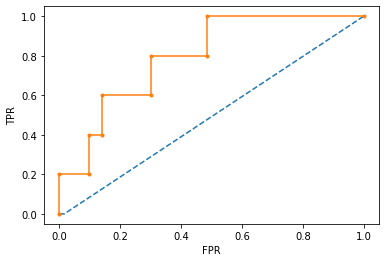

In [57]:
def roc_auc_plot(test_y,naive_prob,pos_prob):
  fpr,tpr,t=roc_curve(test_y,naive_prob)
  plt.plot(fpr,tpr,linestyle="--",label="Random")
  fpr,tpr,t=roc_curve(test_y,pos_proba)
  plt.plot(fpr,tpr,marker=".",label="Logistic")
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.show()

model=LogisticRegression(solver="lbfgs")
model.fit(train_X,train_y)
yhat=model.predict_proba(test_X)
pos_prob=yhat[:,1]
yhat_1=model.predict(test_X)
auc_score=roc_auc_score(test_y,pos_prob)
print(auc_score)

model=DummyClassifier(strategy="stratified")
model.fit(train_X,train_y)
yhat=model.predict_proba(test_X)
naive_prob=yhat[:,1]
auc_score=roc_auc_score(test_y,naive_prob)
print(auc_score)

roc_auc_plot(test_y,naive_prob,pos_prob)   

# The problem of the classifier which is recognised by PRAUC is not recognised by ROCAUC.
# the problem of the classifier is it takes deafaul prob threshold 0.5 and i think all the posotive point
# prob score less than 0.5 and so all are classified as 0 whic is recognised by PRAUC not ROCAUC.
# Since PRAUC is focused on minority class whreas ROCAUC is not biases to class label.
# We can check this problem of classifier by seeing predicted class label and histogram of prob of positive class label.

In [0]:
from collections import Counter

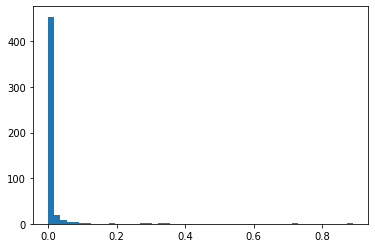

In [59]:
plt.hist(pos_prob,bins=50)
plt.show()

In [60]:
print(Counter(yhat_1))

Counter({0: 498, 1: 2})
